In [95]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
pd.set_option('display.max_columns', 100)

file = '1000sons.csv'
df = pd.read_csv(f"../data/datasets/{file}")
df.head()

,Unnamed: 0,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,target
0,0,-0.013865,0.010635,1.406236,2.950485,-0.211243,9.598260,0.774470,2.594167,6.525979,0.494994,1.987397,5.764487,0.270709,1.491078,4.748601,0.074893,-0.127367,0.005087,0.001161,0.000101,21.185157,0.239510,88.451914,602.893980,528.312710,0.970894,1.833417,6.083124,8.009027,91.404403,0.105352,0.589145,2.236669,0.034273,0.214853,0.998838,0.017200,0.108250,0.520971,0.942032,0.966254,0.988149,0.021348,0.017303,0.007125,104203.033634,220.463993,472.653299,0.228746,0.690367,641.421272,1.960434,4.371861,88.102968,11470.236532,0.001041,0.016669,1.483083,0.000172,0.003662,1.068329,0.000086,0.001832,0.631277,-0.151054,0.998028,0.999085,0.999462,0.000124,0.000041,0.000032,car
1,1,-0.005750,0.005750,-0.067762,1.324195,0.010104,4.036404,1.537933,3.997792,8.049959,1.233164,3.706688,7.759653,0.745140,3.143407,7.158429,0.759557,-0.703132,0.022159,0.006041,0.001501,46.894904,0.268783,174.471170,496.153094,1277.821811,0.963201,2.085905,5.072006,17.723132,471.649330,0.025004,0.179960,2.482011,0.006375,0.056451,1.432642,0.003190,0.028345,0.758355,0.990009,0.994998,0.997791,0.006249,0.003048,0.001941,118533.280711,272.964487,434.244330,0.471133,1.138973,631.149658,1.576703,2.823063,69.065157,9622.411132,0.001540,0.021478,1.580390,0.000288,0.005171,1.203997,0.000144,0.002587,0.764677,-0.388866,0.996907,0.998839,0.999642,0.000159,0.000095,0.000005,skateboard
2,2,-0.005176,0.005176,-0.459363,1.391947,-0.063639,3.324252,1.683423,4.167587,8.221880,1.419382,3.906142,7.960463,0.905370,3.331479,7.322059,0.755834,-0.721263,0.033029,0.011107,0.002435,46.734656,0.329851,141.684315,819.545716,1213.677877,0.944033,2.113485,5.806135,10.772333,235.092436,0.016840,0.395283,2.651508,0.004123,0.164549,1.544258,0.002062,0.083613,0.839261,0.968748,0.993615,0.998571,0.029270,0.006503,0.001451,145463.894782,272.827369,533.171929,0.422993,1.072030,643.852843,1.646276,3.052976,120.201850,22071.589603,0.000729,0.009286,1.318595,0.000118,0.002055,0.973538,0.000059,0.001028,0.596105,-0.333651,0.998834,0.999542,0.999909,0.000141,0.000032,0.000014,skateboard
3,3,-0.009864,0.008661,-0.135025,1.305172,-0.096249,5.261340,0.953511,3.302673,7.329943,0.625519,2.964925,6.936253,0.343006,2.332931,5.039850,0.114243,-0.088041,0.010470,0.000759,0.000124,32.592223,0.268828,121.238366,554.529172,1020.183962,0.964456,1.853488,3.944648,8.892580,120.699411,0.049361,0.454518,2.184305,0.014510,0.174255,0.879206,0.007268,0.088153,0.444144,0.963994,0.983810,0.994975,0.021330,0.012844,0.005417,116797.746415,261.405578,446.806634,0.481089,1.160839,630.593989,1.558702,2.768351,101.425767,14854.717935,0.001615,0.013478,1.528155,0.000292,0.003015,1.271788,0.000146,0.001508,0.868470,-0.231955,0.998403,0.999600,0.999798,0.000354,0.000106,0.000023,car
4,4,-0.006727,0.006258,-0.702660,1.388673,-0.004348,3.084084,1.402122,3.849201,7.902192,1.143065,3.611598,7.664164,0.697596,3.070417,7.080205,0.286332,-0.280527,0.033810,0.009265,0.000694,67.859102,0.306389,221.479895,905.793559,1469.529268,0.951907,1.510018,2.727929,17.920943,732.170708,0.007021,0.175956,1.956121,0.001505,0.060907,0.882111,0.000753,0.030643,0.448182,0.990354,0.997760,0.999478,0.008463,0.002231,0.000463,135117.045084,288.028575,469.109863,0.402737,0.998509,632.010882,1.691660,3.248242,107.903211,19734.474128,0.000722,0.013506,1.495589

In [96]:
print( df.isna().sum().sort_values(ascending=False))

Unnamed: 0    0
feature36     0
feature52     0
feature51     0
feature50     0
             ..
feature23     0
feature22     0
feature21     0
feature20     0
target        0
Length: 73, dtype: int64


In [97]:
tmp = df.shape[1]
df.dropna(axis='columns', inplace=True)
print("{} colonnes ont été supprimés car les valeurs étaient aberrantes".format(tmp - df.shape[1]))

0 colonnes ont été supprimés car les valeurs étaient aberrantes


In [98]:
y = df["target"]
X = df.select_dtypes(include=['int', 'float'])

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)
print("Il y a {} données pour notre set de training.\nIl y a {} données pour notre set de test".format(len(X_train), len(X_test)))

unique, counts = np.unique(y_train, return_counts=True)
target1 = unique[0]
target2 = unique[1]

Il y a 1601 données pour notre set de training.
Il y a 401 données pour notre set de test


In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
def launch_model(model):
    model.fit(X_train, y_train)

    #Prédictions avec le set de test
    predictions = model.predict(X_test)
    print("Comme prédictions, nous obtenons les résultats suivants : \n{}".format(predictions))
    
    #Calculer la précision
    sc = model.score(X_test, y_test)
    print("En comparant nos valeurs prédites avec celles attendues, nous obtenons le score de précision suivant : \n{}.".format(sc))
    
    # Plot the confusion matrix
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)
    disp.figure_.suptitle("Confusion Matrix")
    print(f"Matrice de confusion:\n{disp.confusion_matrix}")

<h2>Test du model SVC</h2>

Comme prédictions, nous obtenons les résultats suivants : 
['skateboard' 'car' 'skateboard' 'car' 'car' 'car' 'skateboard' 'car'
 'car' 'skateboard' 'skateboard' 'skateboard' 'skateboard' 'car' 'car'
 'car' 'skateboard' 'skateboard' 'car' 'skateboard' 'skateboard' 'car'
 'skateboard' 'car' 'skateboard' 'skateboard' 'car' 'car' 'skateboard'
 'car' 'car' 'skateboard' 'car' 'car' 'car' 'skateboard' 'skateboard'
 'skateboard' 'skateboard' 'car' 'skateboard' 'skateboard' 'skateboard'
 'skateboard' 'car' 'skateboard' 'skateboard' 'car' 'skateboard' 'car'
 'car' 'skateboard' 'skateboard' 'skateboard' 'skateboard' 'skateboard'
 'car' 'skateboard' 'car' 'car' 'car' 'car' 'car' 'skateboard'
 'skateboard' 'car' 'skateboard' 'car' 'car' 'car' 'car' 'car' 'car'
 'skateboard' 'car' 'skateboard' 'car' 'skateboard' 'skateboard' 'car'
 'car' 'skateboard' 'car' 'car' 'car' 'car' 'skateboard' 'car' 'car'
 'skateboard' 'skateboard' 'skateboard' 'car' 'car' 'car' 'car' 'car'
 'skateboard' 'skateboard' 'car

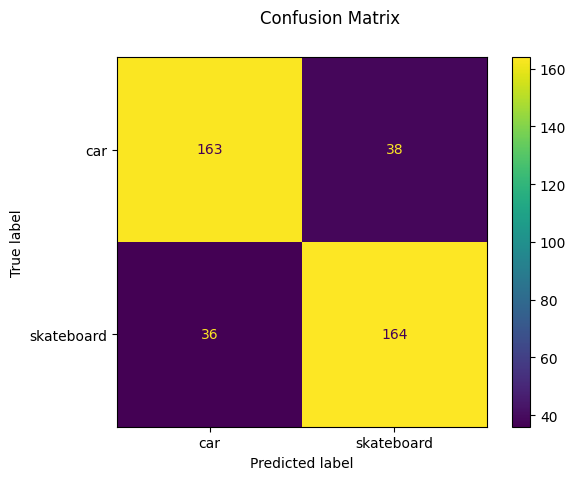

In [103]:
#Entrainement avec le set de training
launch_model(SVC())

<h2> Test d'un modèle Random Forest </h2>

Comme prédictions, nous obtenons les résultats suivants : 
['car' 'car' 'skateboard' 'car' 'car' 'car' 'skateboard' 'car' 'car'
 'skateboard' 'skateboard' 'skateboard' 'skateboard' 'car' 'car' 'car'
 'skateboard' 'car' 'car' 'skateboard' 'skateboard' 'car' 'skateboard'
 'car' 'skateboard' 'car' 'car' 'car' 'skateboard' 'car' 'skateboard'
 'skateboard' 'car' 'car' 'car' 'skateboard' 'skateboard' 'skateboard'
 'skateboard' 'car' 'skateboard' 'skateboard' 'skateboard' 'skateboard'
 'car' 'car' 'skateboard' 'car' 'skateboard' 'car' 'car' 'skateboard'
 'skateboard' 'skateboard' 'car' 'skateboard' 'car' 'skateboard'
 'skateboard' 'skateboard' 'car' 'car' 'car' 'skateboard' 'skateboard'
 'skateboard' 'skateboard' 'car' 'car' 'car' 'car' 'car' 'car'
 'skateboard' 'car' 'skateboard' 'car' 'skateboard' 'skateboard' 'car'
 'car' 'skateboard' 'car' 'car' 'car' 'car' 'skateboard' 'car' 'car' 'car'
 'skateboard' 'skateboard' 'car' 'car' 'skateboard' 'car' 'car'
 'skateboard' 'skateboard' 'car' 'skat

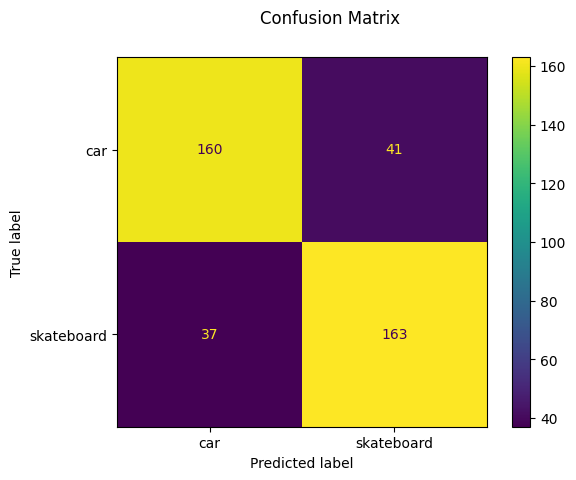

In [104]:
from sklearn.ensemble import RandomForestClassifier

launch_model(RandomForestClassifier(n_estimators=100))

<h2>Test du modele Gaussian Naive Bayes</h2>

Comme prédictions, nous obtenons les résultats suivants : 
['skateboard' 'car' 'skateboard' 'skateboard' 'skateboard' 'skateboard'
 'skateboard' 'skateboard' 'skateboard' 'skateboard' 'skateboard'
 'skateboard' 'skateboard' 'skateboard' 'skateboard' 'skateboard'
 'skateboard' 'skateboard' 'skateboard' 'skateboard' 'skateboard' 'car'
 'skateboard' 'car' 'skateboard' 'skateboard' 'skateboard' 'car'
 'skateboard' 'car' 'skateboard' 'skateboard' 'skateboard' 'car'
 'skateboard' 'skateboard' 'skateboard' 'skateboard' 'car' 'car'
 'skateboard' 'skateboard' 'skateboard' 'skateboard' 'skateboard'
 'skateboard' 'skateboard' 'skateboard' 'skateboard' 'skateboard'
 'skateboard' 'skateboard' 'skateboard' 'skateboard' 'skateboard'
 'skateboard' 'skateboard' 'skateboard' 'skateboard' 'skateboard'
 'skateboard' 'skateboard' 'skateboard' 'skateboard' 'skateboard'
 'skateboard' 'skateboard' 'skateboard' 'car' 'skateboard' 'car'
 'skateboard' 'car' 'skateboard' 'car' 'skateboard' 'skateboard'
 'skateboa

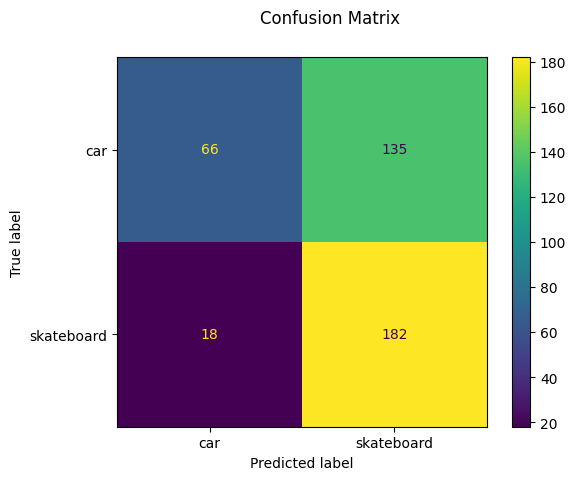

In [105]:
from sklearn.naive_bayes import GaussianNB

launch_model(GaussianNB())

<h2>Test du modèle Régression Logistique</h2>

Comme prédictions, nous obtenons les résultats suivants : 
['skateboard' 'car' 'skateboard' 'car' 'car' 'car' 'skateboard' 'car'
 'car' 'skateboard' 'skateboard' 'skateboard' 'skateboard' 'car' 'car'
 'car' 'skateboard' 'skateboard' 'car' 'skateboard' 'skateboard' 'car'
 'skateboard' 'car' 'skateboard' 'skateboard' 'car' 'car' 'skateboard'
 'car' 'skateboard' 'skateboard' 'car' 'car' 'car' 'skateboard'
 'skateboard' 'skateboard' 'skateboard' 'car' 'skateboard' 'skateboard'
 'skateboard' 'skateboard' 'car' 'car' 'skateboard' 'car' 'skateboard'
 'car' 'car' 'skateboard' 'skateboard' 'skateboard' 'skateboard'
 'skateboard' 'car' 'skateboard' 'car' 'skateboard' 'car' 'car' 'car'
 'skateboard' 'skateboard' 'car' 'skateboard' 'car' 'car' 'car' 'car'
 'car' 'car' 'skateboard' 'car' 'skateboard' 'car' 'skateboard'
 'skateboard' 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'skateboard'
 'skateboard' 'car' 'skateboard' 'skateboard' 'skateboard' 'car' 'car'
 'car' 'car' 'car' 'car' 'skateboard' 'car

C:\Users\utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


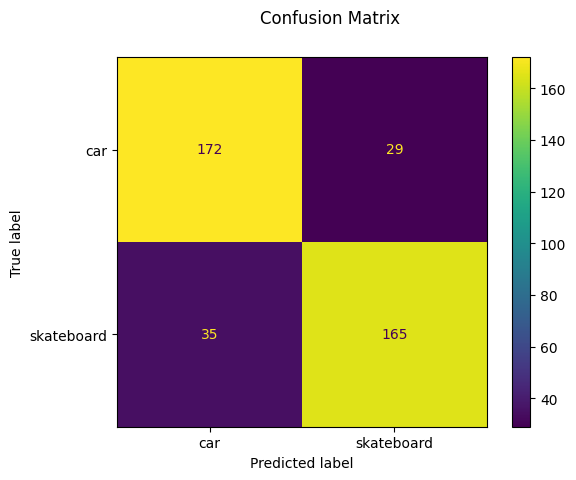

In [106]:
from sklearn.linear_model import LogisticRegression

launch_model(LogisticRegression())


<h2>Test d'un réseau de neurones</h2>
Ne fonctionne qu'avec 2 labels !


In [107]:
from keras.utils import to_categorical
y_train.replace(to_replace=target1,
           value=0, inplace=True)
y_train.replace(to_replace=target2,
           value=1, inplace=True)
y_test.replace(to_replace=target1,
           value=0, inplace=True)
y_test.replace(to_replace=target2,
           value=1, inplace=True)

In [108]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


def initialize_model():   
    # Define the model
    model = Sequential([
        # First layer with 5 neurons, relu activation and input shape
        Dense(10, activation='relu', input_dim = X_train.shape[1]),
        # Output layer for 2-class classification
        Dense(1, activation='sigmoid')
    ])
    return model

model = initialize_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10,# how many epochs to wait before stopping
    restore_best_weights=True,    
    )

model.fit(
    X_train, y_train,
    batch_size=2,
    epochs=100,
    validation_split=0.3,
    callbacks=[early_stopping]    
)


Epoch 1/100


C:\Users\utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


560/560 [==============================] - 2s 2ms/step - loss: 0.5866 - accuracy: 0.6884 - val_loss: 0.4898 - val_accuracy: 0.7734
Epoch 2/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4559 - accuracy: 0.7911 - val_loss: 0.4298 - val_accuracy: 0.8150
Epoch 3/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4116 - accuracy: 0.8080 - val_loss: 0.4106 - val_accuracy: 0.8212
Epoch 4/100
560/560 [==============================] - 1s 2ms/step - loss: 0.3846 - accuracy: 0.8277 - val_loss: 0.4089 - val_accuracy: 0.8274
Epoch 5/100
560/560 [==============================] - 1s 2ms/step - loss: 0.3713 - accuracy: 0.8393 - val_loss: 0.4035 - val_accuracy: 0.8170
Epoch 6/100
560/560 [==============================] - 1s 2ms/step - loss: 0.3593 - accuracy: 0.8429 - val_loss: 0.3968 - val_accuracy: 0.8233
Epoch 7/100
560/560 [==============================] - 1s 2ms/step - loss: 0.3510 - accuracy: 0.8455 - val_loss: 0.4046 - val_accuracy: 0.8337
Epoch 8/100

In [109]:
 #Prédictions avec le set de test
predictions = model.predict(X_test)
print("Comme prédictions, nous obtenons les résultats suivants : \n{}".format(predictions))
    
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

13/13 [==============================] - 0s 2ms/step
Comme prédictions, nous obtenons les résultats suivants : 
[[7.67405391e-01]
 [1.19541155e-05]
 [9.47100937e-01]
 [3.49873483e-01]
 [2.48461068e-02]
 [4.61236119e-01]
 [9.98574436e-01]
 [3.30152720e-01]
 [1.10550754e-01]
 [6.18937790e-01]
 [9.61564958e-01]
 [9.39454794e-01]
 [9.10753489e-01]
 [3.39699000e-01]
 [1.43076882e-01]
 [2.41630167e-01]
 [9.72492278e-01]
 [6.14990056e-01]
 [4.04258333e-02]
 [9.30690229e-01]
 [9.24607694e-01]
 [2.28200644e-01]
 [7.19372392e-01]
 [3.11946720e-02]
 [9.41689193e-01]
 [6.63410068e-01]
 [3.08077097e-01]
 [4.95221838e-03]
 [8.90000224e-01]
 [1.64005277e-03]
 [5.48349798e-01]
 [7.89098322e-01]
 [9.43305790e-02]
 [4.65825312e-02]
 [2.73098350e-01]
 [9.92273629e-01]
 [6.31036937e-01]
 [8.46957147e-01]
 [9.92453277e-01]
 [1.49095086e-02]
 [9.66289937e-01]
 [9.58262384e-01]
 [9.26569760e-01]
 [9.39417243e-01]
 [3.31289500e-01]
 [6.36417449e-01]
 [9.08044159e-01]
 [3.28738838e-01]
 [9.22351182e-01]
 [2.14